In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import ds_functions as ds

fp_ds2 = "../datasets/qsar_oral_toxicity.csv"
original = pd.read_csv(fp_ds2, parse_dates=False, sep=';')
my_palette = {'yellow': '#ECD474', 'pale orange': '#E9AE4E', 'salmon': '#E2A36B', 'orange': '#F79522', 'dark orange': '#D7725E',
              'pale acqua': '#92C4AF', 'acqua': '#64B29E', 'marine': '#3D9EA9', 'green': '#10A48A', 'olive': '#99C244',
              'pale blue': '#BDDDE0', 'blue2': '#199ED5', 'blue3': '#1DAFE5', 'dark blue': '#0C70B2',
              'pale pink': '#D077AC', 'pink': '#EA4799', 'lavender': '#E09FD5', 'lilac': '#B081B9', 'purple': '#923E97',
              'white': '#FFFFFF', 'light grey': '#D2D3D4', 'grey': '#939598', 'black': '#000000'}

In [49]:
import datetime as dt

NR_COLUMNS: int = 3
HEIGHT: int = 4


def choose_grid(nr):
    if nr < NR_COLUMNS:
        return 1, nr
    else:
        return (nr // NR_COLUMNS, NR_COLUMNS) if nr % NR_COLUMNS == 0 else (nr // NR_COLUMNS + 1, NR_COLUMNS)


def set_axes(xvalues: list, ax: plt.Axes = None, title: str = '', xlabel: str = '', ylabel: str = '', percentage=False):
    if ax is None:
        ax = plt.gca()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xvalues, fontsize='small', ha='center')

    return ax


def set_locators(xvalues: list, ax: plt.Axes = None):
    if isinstance(xvalues[0], dt.datetime):
        locator = mdates.AutoDateLocator()
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator, defaultfmt='%Y-%m-%d'))
    else:
        ax.set_xticks(xvalues)
        ax.set_xlim(xvalues[0], xvalues[-1])

    return ax


def plot_line(xvalues: list, yvalues: list, ax: plt.Axes = None, title: str = '', xlabel: str = '',
              ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)
    ax = set_locators(xvalues, ax=ax)
    ax.plot(xvalues,  yvalues, c=cfg.LINE_COLOR)


def multiple_line_chart(xvalues: list, yvalues: dict, ax: plt.Axes = None, title: str = '',
                        xlabel: str = '', ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)
    ax = set_locators(xvalues, ax=ax)

    legend: list = []
    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend)


def bar_chart(xvalues: list, yvalues: list, ax: plt.Axes = None, title: str = '',
              xlabel: str = '', ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)
    ax.bar(xvalues, yvalues, edgecolor=my_palette['dark blue'], color=my_palette['pale blue'])


def multiple_bar_chart(xvalues: list, yvalues: dict, ax: plt.Axes = None, title: str = '',
                       xlabel: str = '', ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)

    x = np.arange(len(xvalues))  # the label locations

    width = 0.8 / (len(xvalues)*len(yvalues))
    # the width of the bars
    step = width / len(xvalues)
    i: int = 0
    for metric in yvalues:
        ax.bar(x + i*width, yvalues[metric], width=width, align='center', label=metric)
        i += 1
    ax.set_xticks(x + width/len(xvalues) - step/2)
    ax.legend(fontsize='x-small', title_fontsize='small')


def plot_confusion_matrix(cnf_matrix: np.ndarray, classes_names: np.ndarray,
                          ax: plt.Axes = None, normalize: bool = False):
    if ax is None:
        ax = plt.gca()
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=clrs.LinearSegmentedColormap.from_list("myCMPBlues", [my_palette['pale blue'], my_palette['blue2'], my_palette['blue3'], my_palette['dark blue']]))

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), color='w', horizontalalignment="center")


def plot_evaluation_results(labels: np.ndarray, trn_y, prd_trn, tst_y, prd_tst):
    cnf_mtx_trn = metrics.confusion_matrix(trn_y, prd_trn, labels)
    tn_trn, fp_trn, fn_trn, tp_trn = cnf_mtx_trn.ravel()
    cnf_mtx_tst = metrics.confusion_matrix(tst_y, prd_tst, labels)
    tn_tst, fp_tst, fn_tst, tp_tst = cnf_mtx_tst.ravel()

    evaluation = {'Accuracy': [(tn_trn + tp_trn) / (tn_trn + tp_trn + fp_trn + fn_trn),
                               (tn_tst + tp_tst) / (tn_tst + tp_tst + fp_tst + fn_tst)],
                  'Recall': [tp_trn / (tp_trn + fn_trn), tp_tst / (tp_tst + fn_tst)],
                  'Specificity': [tn_trn / (tn_trn + fp_trn), tn_tst / (tn_tst + fp_tst)],
                  'Precision': [tp_trn / (tp_trn + fp_trn), tp_tst / (tp_tst + fp_tst)]}

    fig, axs = plt.subplots(1, 2, figsize=(2 * HEIGHT, HEIGHT))
    multiple_bar_chart(['Train', 'Test'], evaluation, ax=axs[0], title="Model's performance over Train and Test sets")
    plot_confusion_matrix(cnf_mtx_tst, labels, ax=axs[1])


def plot_roc_chart(models: dict, tstX: np.ndarray, tstY: np.ndarray, ax: plt.Axes = None, target: str = 'class'):
    if ax is None:
        ax = plt.gca()
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s' % target)

    ax.plot([0, 1], [0, 1], color='navy', label='random', linewidth=1, linestyle='--',  marker='')
    for clf in models.keys():
        metrics.plot_roc_curve(models[clf], tstX, tstY, ax=ax, marker='', linewidth=1)
    ax.legend(loc="lower right")

In [50]:
original.describe(include='all')

0          0.1          0.2          0.3          0.4  \
count   8991.000000  8991.000000  8991.000000  8991.000000  8991.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.212991     0.035702     0.068735     0.033367     0.018685   
std        0.409444     0.185557     0.253018     0.179602     0.135419   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     0.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

                0.5          0.6          0.7          0.8          0.9  ...  \
count   8991.000000  8991.000000  8991.000000  8991.000000  8991.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean       0.144811     0.123123     0.193749     0.013792     0.017351  ...   
std        0.351930     0.328597     0.395257     0.116631     0.130582  ...   
min        0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%        0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%        0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%        0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max        1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              0.962        0.963        0.964        0.965        0.966  \
count   8991.000000  8991.000000  8991.000000  8991.000000  8991.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.061284     0.016683     0.164387     0.239017     0.022467   
std        0.239863     0.128089     0.370647     0.426507     0.148205   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     0.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

              0.967        0.968        0.969        0.970  negative  
count   8991.000000  8991.000000  8991.000000  8991.000000      8991  
unique          NaN          NaN          NaN          NaN         2  
top             NaN          NaN          NaN          NaN  negative  
freq            NaN          NaN          NaN          NaN      8250  
mean       0.022022     0.021800     0.022356     0.018463       NaN  
std        0.146763     0.146037     0.147846     0.134626       NaN  
min        0.000000     0.000000     0.000000     0.000000       NaN  
25%        0.000000     0.000000     0.000000     0.000000       NaN  
50%        0.000000     0.000000     0.000000     0.000000       NaN  
75%        0.000000     0.000000     0.000000     0.000000       NaN  
max        1.000000     1.000000     1.000000     1.000000       NaN  

[11 rows x 1025 columns]

In [51]:
sb_vars = original.select_dtypes(include='object')
original[sb_vars.columns] = original.select_dtypes(['object']).apply(lambda x: x.astype('category'))

cols_nr = original.select_dtypes(include='number')
cols_sb = original.select_dtypes(include='category')
original.dtypes

0              int64
0.1            int64
0.2            int64
0.3            int64
0.4            int64
              ...   
0.967          int64
0.968          int64
0.969          int64
0.970          int64
negative    category
Length: 1025, dtype: object

In [52]:
#NO NEED FOR SCALING SINCE THE DATA IS ALREADY ALL 0 0 OR ASDAS

In [53]:
corr = original.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
original.drop(original[to_drop], axis = 1, inplace = True)
original.drop_duplicates()
print(to_drop)
original.head()

['0.50', '1.3', '0.95', '0.119', '0.162', '1.11', '0.220', '0.223', '1.14', '0.287', '0.306', '0.369', '1.18', '0.389', '1.19', '0.404', '1.21', '1.24', '1.25', '0.479', '0.497', '0.507', '0.508', '0.512', '0.530', '0.570', '1.30', '0.594', '1.33', '1.34', '1.35', '0.621', '0.634', '0.641', '0.646', '1.37', '0.664', '0.689', '0.693', '0.699', '0.709', '0.713', '0.714', '1.40', '1.41', '1.42', '1.43', '0.769', '0.775', '0.779', '0.791', '0.807', '0.825', '1.44', '0.828', '0.839', '0.854', '1.45', '0.869', '0.887', '1.48', '0.914', '1.50', '1.51', '0.942', '0.944', '0.954', '0.964']


0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.961  0.962  0.963  \
0  0    0    1    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    1    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1    0    0    0    0    0    1    0    0    0  ...      0      0      0   

   0.965  0.966  0.967  0.968  0.969  0.970  negative  
0      0      0      0      0      0      0  negative  
1      0      0      0      0      0      0  negative  
2      0      0      0      0      0      0  negative  
3      0      0      0      0      0      0  negative  
4      0      0      1      0      0      0  negative  

[5 rows x 957 columns]

In [54]:
#Removed 68 columns with >80% correlation
original.to_csv(r'ds2_no_correlation.csv')

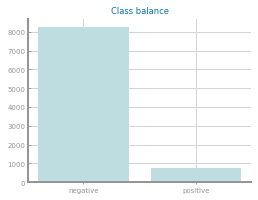

Minority class: 741
Majority class: 8250
Proportion: 0.09 : 1


In [55]:
target_count = original['negative'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

In [56]:
#There's a big unbalance in this dataset. We will need to use balancing techniques for the training set

In [57]:
dummy = pd.get_dummies(original.negative, prefix='new').iloc[:,:1]
result = pd.concat([original, dummy], axis = 1)
result.pop('negative')
result.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.961  0.962  0.963  \
0  0    0    1    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    1    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1    0    0    0    0    0    1    0    0    0  ...      0      0      0   

   0.965  0.966  0.967  0.968  0.969  0.970  new_negative  
0      0      0      0      0      0      0             1  
1      0      0      0      0      0      0             1  
2      0      0      0      0      0      0             1  
3      0      0      0      0      0      0             1  
4      0      0      1      0      0      0             1  

[5 rows x 957 columns]

In [58]:
original.to_csv(r'ds2_no_correlation_dummy_target.csv')

0.0--->(8991, 957)
0.0--->(8991, 957)
acc:0.9262416604892513 prec:0.9648836259697836 rec:0.9543618739903069
0.01--->(8991, 952)
0.01--->(8991, 952)
acc:0.9262416604892513 prec:0.9648836259697836 rec:0.9543618739903069
0.02--->(8991, 795)
0.02--->(8991, 795)
acc:0.9262416604892513 prec:0.9656441717791411 rec:0.9535541195476576
0.03--->(8991, 599)
0.03--->(8991, 599)
acc:0.9243884358784284 prec:0.9636734693877551 rec:0.9535541195476576
0.04--->(8991, 472)
0.04--->(8991, 472)
acc:0.9251297257227576 prec:0.9648405560098119 rec:0.9531502423263328
0.05--->(8991, 359)
0.05--->(8991, 359)
acc:0.9221645663454411 prec:0.9616951915240424 rec:0.9531502423263328
0.06--->(8991, 287)
0.06--->(8991, 287)
acc:0.9325426241660489 prec:0.961755233494364 rec:0.9648626817447497
0.07--->(8991, 239)
0.07--->(8991, 239)
acc:0.938472942920682 prec:0.9579698651863601 rec:0.975767366720517
0.08--->(8991, 190)
0.08--->(8991, 190)
acc:0.8821349147516679 prec:0.9499582985821518 rec:0.9200323101777059
0.09--->(8991, 

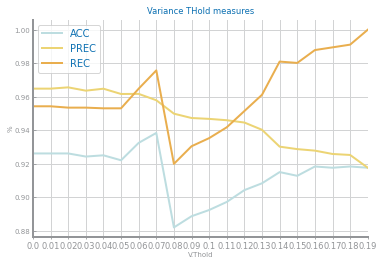

In [59]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics

def variance_threshold_selector(data, threshold=0.05):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

acc = []
prec = []
rec = []

xvalues = {}
tholds = []
for tholds_iter in range(0,20,1):
    thold = tholds_iter/100
    tholds.append(thold)
    df_1 = result.copy()
    features = variance_threshold_selector(df_1, thold)
    y: np.ndarray = df_1.pop('new_negative').values
    print(str(thold) + '--->' + str(features.shape))
    trnX, tstX, trnY, tstY = train_test_split(features, y, train_size=0.7, stratify=y, random_state=42)
    clf = MultinomialNB()
    clf.fit(trnX,trnY)
    ypred=clf.predict(tstX)
    acc_l = metrics.accuracy_score(tstY, ypred)
    acc.append(acc_l)
    prec_l = metrics.precision_score(tstY, ypred)
    prec.append(prec_l)
    rec_l = metrics.recall_score(tstY, ypred)
    rec.append(rec_l)
    print(str(thold) + '--->' + str(features.shape))
    print("acc:%s prec:%s rec:%s"%(acc_l,prec_l,rec_l))

xvalues['ACC'] = acc
xvalues['PREC'] = prec
xvalues['REC'] = rec
plt.figure(figsize=(6,4))
ds.multiple_line_chart([t for t in tholds], xvalues, title='Variance THold measures',
                         xlabel='V.Thold', ylabel='%', percentage=False)

plt.show()

In [60]:
# ACC and Recall spike at around 0.7 Variance Threshold

In [61]:
no_variance = variance_threshold_selector(result, threshold=0.07)
no_variance.head()
no_variance.to_csv(r'ds2_no_correlation_dummy_target_no_low_variance.csv')